**5. Image Binary Classification Part 1 (30 pts)**

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5684 - loss: 2.2758 - val_accuracy: 0.1905 - val_loss: 3.6316
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3907 - loss: 2.4633 - val_accuracy: 0.8095 - val_loss: 0.6472
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5411 - loss: 1.0524 - val_accuracy: 0.7619 - val_loss: 0.6762
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6420 - loss: 0.9309 - val_accuracy: 0.2857 - val_loss: 1.2211
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6624 - loss: 0.7390 - val_accuracy: 0.6190 - val_loss: 0.6394
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6461 - loss: 0.6072 - val_accuracy: 0.7619 - val_loss: 0.6321
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6215 - loss: 0.6516 - val_accuracy: 0.7619 - val_loss: 0.6345
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6865 - loss: 0.6158 - val_accuracy: 0.5238 - val_loss: 0.7571


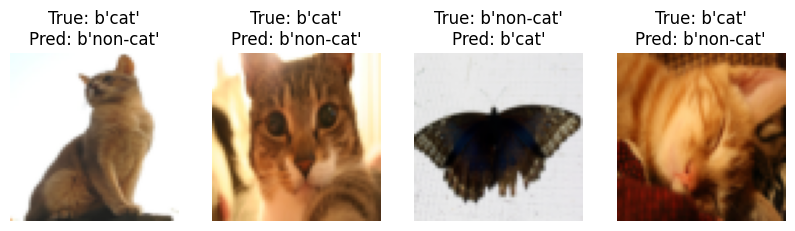

In [13]:
# Import required libraries
import h5py  # For reading HDF5 files
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
from tensorflow.keras.models import Sequential  # For creating neural network
from tensorflow.keras.layers import Dense, Flatten  # Neural network layers
from tensorflow.keras.optimizers import Adam  # Optimizer for training
from tensorflow.keras.utils import to_categorical  # For one-hot encoding

def load_dataset(train_file='train_catvnoncat.h5', test_file='test_catvnoncat.h5'):
    """
    Load the dataset from HDF5 files containing cat vs non-cat images.

    Parameters:
    - train_file: str, path to the training dataset file.
    - test_file: str, path to the test dataset file.

    Returns:
    - train_set_x_orig: np.array, training set features (images).
    - train_set_y_orig: np.array, training set labels (0/1).
    - test_set_x_orig: np.array, test set features (images).
    - test_set_y_orig: np.array, test set labels (0/1).
    - classes: np.array, list of classes (cat/non-cat).
    """
    try:
        # Open both training and test datasets
        with h5py.File(train_file, "r") as train_dataset, h5py.File(test_file, "r") as test_dataset:
            # Load data from HDF5 files into numpy arrays
            train_set_x_orig = np.array(train_dataset["train_set_x"][:])
            train_set_y_orig = np.array(train_dataset["train_set_y"][:])
            test_set_x_orig = np.array(test_dataset["test_set_x"][:])
            test_set_y_orig = np.array(test_dataset["test_set_y"][:])
            classes = np.array(test_dataset["list_classes"][:])

            # Reshape labels to have proper dimensions
            train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
            test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

            return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
    except Exception as e:
        print(f"Error loading dataset: {e}")
        raise

def preprocess_data(train_x, train_y, test_x, test_y):
    """
    Preprocess the dataset by normalizing images and converting labels to categorical format.

    Parameters:
    - train_x, test_x: np.array, feature datasets (images).
    - train_y, test_y: np.array, label datasets (0/1).

    Returns:
    - train_x, test_x: Normalized image data (pixel values divided by 255).
    - train_y, test_y: One-hot encoded labels.
    """
    # Normalize pixel values to range [0,1]
    train_x = train_x / 255.0
    test_x = test_x / 255.0

    # Convert labels to one-hot encoding
    train_y = to_categorical(train_y.T, num_classes=2)
    test_y = to_categorical(test_y.T, num_classes=2)

    return train_x, train_y, test_x, test_y

def build_model(input_shape, num_classes=2):
    """
    Build a Sequential neural network model for image classification.

    Parameters:
    - input_shape: tuple, shape of the input images.
    - num_classes: int, number of output classes (default=2 for binary classification).

    Returns:
    - model: compiled Keras Sequential model ready for training.
    """
    # Create sequential model
    model = Sequential([
        Flatten(input_shape=input_shape),  # Flatten the input images
        Dense(128, activation='relu'),     # First hidden layer
        Dense(64, activation='relu'),      # Second hidden layer
        Dense(num_classes, activation='softmax')  # Output layer
    ])

    # Compile model with Adam optimizer and categorical crossentropy loss
    model.compile(optimizer=Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

def display_images(images, indices, true_labels, predicted_labels, classes, num_images=4):
    """
    Display images with their true and predicted labels for visualization.

    Parameters:
    - images: np.array, original images to display.
    - indices: list, indices of images to display.
    - true_labels: np.array, true labels of the images.
    - predicted_labels: np.array, predicted labels of the images.
    - classes: np.array, class names (cat/non-cat).
    - num_images: int, number of images to display (default=4).
    """
    plt.figure(figsize=(10, 10))
    for i, index in enumerate(indices[:num_images]):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[index])
        plt.title(f"True: {classes[true_labels[index]]}\nPred: {classes[predicted_labels[index]]}")
        plt.axis('off')
    plt.show()

def main():
    """
    Main function to orchestrate the training and evaluation of the cat vs non-cat classifier.
    """
    # Load the dataset
    train_x_orig, train_y_orig, test_x_orig, test_y_orig, classes = load_dataset()

    # Preprocess the data
    train_x, train_y, test_x, test_y = preprocess_data(train_x_orig, train_y_orig, test_x_orig, test_y_orig)

    # Build and train the model
    model = build_model(train_x.shape[1:])
    model.fit(train_x, train_y, epochs=20, batch_size=32, validation_split=0.1)

    # Make predictions and evaluate the model
    predictions = model.predict(test_x)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(test_y, axis=1)

    # Find misclassified examples
    incorrect_indices = np.where(predicted_classes != true_classes)[0]
    print(f"Incorrectly classified indices: {incorrect_indices}")

    # Display misclassified images
    display_images(test_x_orig, incorrect_indices, true_classes, predicted_classes, classes)

# Entry point of the program
if __name__ == "__main__":
    main()
